# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [2]:
print("Для воспроизводимости результатов при повторных запусках!")

Для воспроизводимости результатов при повторных запусках!


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [4]:
np.random.seed(42) # можно убрать, если каждый раз хотим новые случайные объекты :)
df_train.sample(10, replace=False)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [5]:
display

<function IPython.core.display_functions.display(*objs, include=None, exclude=None, metadata=None, transient=None, display_id=None, raw=False, clear=False, **kwargs)>

In [6]:
# 5 - дефолтное значение, но для наглядности добавим
display(df_train.head(5))
display(df_train.tail(5))

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
6996,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0
6998,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



Можем заиспользовать аргумент `include` со значением `all`, таким образом в `describe` попадут статистики по всем колонкам - числовым и категориальным.

In [7]:
df_train.describe(include="all")

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,6999,6999.000000,6.999000e+03,6.999000e+03,6999,6999,6999,6999,6797,6797,6803,6796,6797.000000
unique,1924,NaN,NaN,NaN,4,3,2,5,386,120,316,419,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,116,NaN,NaN,NaN,3793,5826,6095,4587,197,885,330,468,NaN
mean,NaN,2013.818403,6.395152e+05,6.958462e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.419008
std,NaN,4.053095,8.089419e+05,5.772400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965767
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.700000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [8]:
df_test.describe(include="all")

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,1000,1000.000000,1.000000e+03,1000.000000,1000,1000,1000,1000,981,981,981,981,981.000000
unique,621,NaN,NaN,NaN,4,3,2,5,237,88,182,226,NaN
top,Maruti Alto 800 LXI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm,NaN
freq,15,NaN,NaN,NaN,534,837,877,623,23,116,43,57,NaN
mean,NaN,2013.681000,6.179010e+05,71393.341000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.410805
std,NaN,4.012149,7.585539e+05,48486.218662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.919985
min,NaN,1995.000000,3.100000e+04,1303.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
25%,NaN,2011.000000,2.500000e+05,37000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2014.000000,4.349990e+05,61500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.700000e+05,100000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [9]:
df_train.isna().sum().to_frame(name="Количество пропусков")

,Количество пропусков
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,202
engine,202


In [10]:
df_test.isna().sum().to_frame(name="Количество пропусков")

,Количество пропусков
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,19
engine,19


Пропуски есть как в тренировочном датаете, так и в тестовом. Колонки с пропусками: `mileage`, `engine`, `max_power`, `torque`, `seats`.

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [11]:
total_rows_count, _ = df_train.shape

# используем keep="first", чтобы оставить первую из дублирующихся строк
rows_count_with_dropped_duplicates, _ = df_train.drop("selling_price", axis=1).drop_duplicates(keep="first").shape # pandas.DataFrame.duplicated

In [12]:
print(f"Всего {total_rows_count - rows_count_with_dropped_duplicates} строк, для которых есть дубли.")

Всего 1159 строк, для которых есть дубли.


In [13]:
# кол-во дублирующихся строк всего, не оставляя только первую
df_train.drop("selling_price", axis=1).duplicated(keep=False).sum()

1799

(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [14]:
sort_columns = list(filter(lambda column: column != "selling_price", df_train.columns))
df_train.loc[df_train.drop("selling_price", axis=1).duplicated(keep=False)].sort_values(sort_columns)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
1703,Audi Q3 2.0 TDI Quattro Premium Plus,2017,2825000,22000,Diesel,Dealer,Automatic,First Owner,15.73 kmpl,1968 CC,174.33 bhp,380Nm@ 1750-2500rpm,5.0
6307,Audi Q3 2.0 TDI Quattro Premium Plus,2017,2825000,22000,Diesel,Dealer,Automatic,First Owner,15.73 kmpl,1968 CC,174.33 bhp,380Nm@ 1750-2500rpm,5.0
1836,Audi Q5 3.0 TDI Quattro,2014,1850000,76131,Diesel,Individual,Automatic,First Owner,13.22 kmpl,2967 CC,241.4 bhp,580Nm@ 1400-3250rpm,5.0
6704,Audi Q5 3.0 TDI Quattro,2014,1850000,76131,Diesel,Individual,Automatic,First Owner,13.22 kmpl,2967 CC,241.4 bhp,580Nm@ 1400-3250rpm,5.0
117,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5637,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
5652,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
5753,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
5991,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [15]:
df_train = df_train.loc[~df_train.drop("selling_price", axis=1).duplicated(keep="first")]

In [16]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [17]:
df_train = df_train.reset_index(drop=True)
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

Для начала попробуем понять какие вообще единицы измерения существуют в каждом из столбцов

In [18]:
columns = ["mileage", "engine", "max_power", "torque"]

measure_units_df = pd.concat([df_train.loc[:, columns], df_test.loc[:, columns]], ignore_index=True)
print("Уникальные наборы единиц измерения для колонок", columns)
for column in columns:
    measure_units = measure_units_df[column].dropna().str.replace("[^a-zA-Z]", " ", regex=True).str.lower().str.split()
    measure_units = measure_units.apply(lambda value: tuple(value) if isinstance(value, list) else (value, ))
    measure_units_df[f"{column}_unit"] = measure_units
    print(measure_units.apply(tuple).value_counts(), "\n")

Уникальные наборы единиц измерения для колонок ['mileage', 'engine', 'max_power', 'torque']
mileage
(kmpl,)     6549
(km, kg)      86
Name: count, dtype: int64 

engine
(cc,)    6635
Name: count, dtype: int64 

max_power
(bhp,)    6635
()           3
Name: count, dtype: int64 

torque
(nm, rpm)         6009
(kgm, rpm)         393
(nm, at, rpm)      128
(kgm, at, rpm)      80
(nm,)               13
()                   9
(rpm,)               1
(nm, kgm, rpm)       1
Name: count, dtype: int64 



In [19]:
# есть такие значения max_power - будем считать, что не заполнено и менять на pd.nan
measure_units_df[measure_units_df["max_power"] == " bhp"]

,mileage,engine,max_power,torque,mileage_unit,engine_unit,max_power_unit,torque_unit
3586,10.9 km/kg,796 CC,bhp,NaN,"(km, kg)","(cc,)","(bhp,)",NaN


In [20]:
# в mileage есть немного km/kg, chatgpt говорит что можно умножить на 1.33, чтобы получить kmpl)
measure_units_df[measure_units_df["mileage_unit"] == ('km', 'kg')].head(1)

,mileage,engine,max_power,torque,mileage_unit,engine_unit,max_power_unit,torque_unit
5,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)","(km, kg)","(cc,)","(bhp,)","(kgm, rpm)"


In [21]:
measure_units_df[measure_units_df["torque_unit"] == ('nm', 'kgm', 'rpm')].head(1)

,mileage,engine,max_power,torque,mileage_unit,engine_unit,max_power_unit,torque_unit
633,12.8 kmpl,2953 CC,156 bhp,380Nm(38.7kgm)@ 2500rpm,"(kmpl,)","(cc,)","(bhp,)","(nm, kgm, rpm)"


In [22]:
import re

# примеры всех комбинаций мер измерений в torque
measure_units_df["torque_tmp"] = measure_units_df["torque"].str.replace(",", "").apply(lambda value: list() if pd.isna(value) else re.findall("[+]?(?:\d*\.*\d+)", value))
measure_units_df["torque_tmp_len"] = measure_units_df["torque_tmp"].apply(len)
measure_units_df.groupby(["torque_tmp_len", "mileage_unit"]).head(3).sort_values(["torque_tmp_len", "torque_tmp_len"])

,mileage,engine,max_power,torque,mileage_unit,engine_unit,max_power_unit,torque_unit,torque_tmp,torque_tmp_len
3586,10.9 km/kg,796 CC,bhp,NaN,"(km, kg)","(cc,)","(bhp,)",NaN,[],0
129,18.0 kmpl,1969 CC,190 bhp,400Nm,"(kmpl,)","(cc,)","(bhp,)","(nm,)",[400],1
350,18.0 kmpl,1969 CC,190 bhp,400Nm,"(kmpl,)","(cc,)","(bhp,)","(nm,)",[400],1
5697,18.0 kmpl,1969 CC,190 bhp,400Nm,"(kmpl,)","(cc,)","(bhp,)","(nm,)",[400],1
0,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,"(kmpl,)","(cc,)","(bhp,)","(nm, rpm)","[190, 2000]",2
3,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)","(kmpl,)","(cc,)","(bhp,)","(kgm, rpm)","[11.5, 4500]",2
4,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,"(kmpl,)","(cc,)","(bhp,)","(nm, rpm)","[113.75, 4000]",2
5,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)","(km, kg)","(cc,)","(bhp,)","(kgm, rpm)","[7.8, 4500]",2
31,33.44 km/kg,796 CC,40.3 bhp,60Nm@ 3500rpm,"(km, kg)","(cc,)","(bhp,)","(nm, rpm)","[60, 3500]",2
81,26.2 km/kg,998 CC,58.2 bhp,77Nm@ 3500rpm,"(km, kg)","(cc,)","(bhp,)","(nm, rpm)","[77, 3500]",2


С колонками `engine` и `max_power` всё просто - в них существует только один вариант указания единиц измерения, с остыльными двумя сложнее и придётся приводить к одним единицам измерения.

In [23]:
import re

def check_float(x):
    try:
        float(x)
    except ValueError:
        return False
    else:
        return True

def cast_to_float(s: pd.Series) -> pd.Series:
    s = s.apply(lambda value: None if pd.isna(value) or not value.strip() or not check_float(value) else value)
    return s.astype(float)


def split_torque(s: pd.Series) -> tuple[list[float], list[float]]:
    """Разделяет колонку torque на две."""
    torque_nm = []
    torque_max_rpm = []
    for value in s.values:
        if pd.isna(value):
            torque_nm.append(value)
            torque_max_rpm.append(value)
            continue
            
        value = str(value).lower()
        value = value.replace(",", "")
        numbers = re.findall("[+]?(?:\d*\.*\d+)", value)
        
        max_rpm_value = None
        nm_value = None
        
        if len(numbers) == 1:
            if "nm" not in value:
                raise RuntimeError(f"Incorrect value: {value}")
            else:
                nm_value = numbers[0]
        elif len(numbers) == 2:
            nm_value = numbers[0]
            max_rpm_value = numbers[-1]
        elif len(numbers) == 3:
            nm_value = numbers[0]
            max_rpm_value = numbers[-1]
        else:
            value = ""
        
        if "rpm" in value:
            max_rpm_value = numbers[-1]
        
        # переводим kgm в nm    
        if nm_value and "kgm" in value:
            nm_value = float(nm_value) * 9.81
        
        torque_nm.append(nm_value)
        torque_max_rpm.append(max_rpm_value)
        
    return torque_nm, torque_max_rpm

def fix_columns(df: pd.DataFrame, inplace: bool = False, save_base_torque: bool = False) -> pd.DataFrame:
    """Исправляет значения в столбцах, убирая единицы измерения и приводя к float."""
    if not inplace:
        df = df.copy()

    df["engine"] = cast_to_float(df["engine"].str.lower().str.replace("cc", ""))
    df["max_power"] = cast_to_float(df["max_power"].str.lower().str.replace("bhp", ""))
    
    mileage_coef = df["mileage"].str.lower().str.contains("km/kg").map({True: 1.33, False: 1.})
    df["mileage"] = cast_to_float(df["mileage"].str.lower().str.replace("kmpl", "").str.replace("km/kg", ""))
    df["mileage"] = df["mileage"] * mileage_coef
    
    if save_base_torque:
        df["torque_base"] = df["torque"]
    df["torque"], df["max_torque_rpm"] = split_torque(df["torque"])
    df["torque"] = df["torque"].astype(float)
    df["max_torque_rpm"] = df["max_torque_rpm"].astype(float)
    
    return df

fix_columns(measure_units_df, save_base_torque=True).sample(10)

,mileage,engine,max_power,torque,mileage_unit,engine_unit,max_power_unit,torque_unit,torque_tmp,torque_tmp_len,torque_base,max_torque_rpm
1807,43.2516,998.0,58.33,78.0,"(km, kg)","(cc,)","(bhp,)","(nm, rpm)","[78, 3500]",2,78Nm@ 3500rpm,3500.0
5166,24.7000,796.0,47.30,69.0,"(kmpl,)","(cc,)","(bhp,)","(nm, rpm)","[69, 3500]",2,69Nm@ 3500rpm,3500.0
2499,28.4000,1248.0,74.00,190.0,"(kmpl,)","(cc,)","(bhp,)","(nm, rpm)","[190, 2000]",2,190Nm@ 2000rpm,2000.0
3922,19.1000,1197.0,85.80,114.0,"(kmpl,)","(cc,)","(bhp,)","(nm, rpm)","[114, 4000]",2,114Nm@ 4000rpm,4000.0
2993,20.5100,998.0,67.04,90.0,"(kmpl,)","(cc,)","(bhp,)","(nm, rpm)","[90, 3500]",2,90Nm@ 3500rpm,3500.0
2240,15.1000,2179.0,140.00,330.0,"(kmpl,)","(cc,)","(bhp,)","(nm, rpm)","[330, 1600, 2800]",3,330Nm@ 1600-2800rpm,2800.0
5037,25.2000,1248.0,74.00,190.0,"(kmpl,)","(cc,)","(bhp,)","(nm, rpm)","[190, 2000]",2,190Nm@ 2000rpm,2000.0
6758,24.3000,1248.0,88.50,200.0,"(kmpl,)","(cc,)","(bhp,)","(nm, rpm)","[200, 1750]",2,200Nm@ 1750rpm,1750.0
6033,22.0000,1197.0,81.80,113.0,"(kmpl,)","(cc,)","(bhp,)","(nm, rpm)","[113, 4200]",2,113Nm@ 4200rpm,4200.0
3150,20.4000,1194.0,94.93,120.0,"(kmpl,)","(cc,)","(bhp,)","(nm, rpm)","[120, 4250]",2,120Nm@ 4250rpm,4250.0


In [24]:
df_train = fix_columns(df_train)
df_test = fix_columns(df_test)

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [25]:
from sklearn.impute import SimpleImputer

numeric_columns = df_train.select_dtypes(np.number).columns
imputer_median = SimpleImputer(missing_values=np.nan, strategy="median")

df_train[numeric_columns] = imputer_median.fit_transform(df_train[numeric_columns])
df_test[numeric_columns] = imputer_median.transform(df_test[numeric_columns])

In [26]:
df_train.isna().mean()

name              0.0
year              0.0
selling_price     0.0
km_driven         0.0
fuel              0.0
seller_type       0.0
transmission      0.0
owner             0.0
mileage           0.0
engine            0.0
max_power         0.0
torque            0.0
seats             0.0
max_torque_rpm    0.0
dtype: float64

In [27]:
df_test.isna().mean()

name              0.0
year              0.0
selling_price     0.0
km_driven         0.0
fuel              0.0
seller_type       0.0
transmission      0.0
owner             0.0
mileage           0.0
engine            0.0
max_power         0.0
torque            0.0
seats             0.0
max_torque_rpm    0.0
dtype: float64


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [28]:
df_train["seats"].value_counts().sort_index()

seats
2.0        2
4.0       94
5.0     4618
6.0       48
7.0      800
8.0      191
9.0       68
10.0      18
14.0       1
Name: count, dtype: int64

In [29]:
print("""
    Seats - по сути количество мест. Это значение можно считать дискретным, ограниченным и т.д., а значит в теории можно воспринимать как категориальное.
    Например, машины с двумя местами могут быть спортивными и стоить больше, и в этом случае категориальный вариант переменной может зарешать больше.
    С другой стороны, в более общем и среднем случае наверное может сохраняться зависимость больше мест -> больше машина -> дороже
    Нужно эксперементировать.
"""
)


    Seats - по сути количество мест. Это значение можно считать дискретным, ограниченным и т.д., а значит в теории можно воспринимать как категориальное.
    Например, машины с двумя местами могут быть спортивными и стоить больше, и в этом случае категориальный вариант переменной может зарешать больше.
    С другой стороны, в более общем и среднем случае наверное может сохраняться зависимость больше мест -> больше машина -> дороже
    Нужно эксперементировать.



In [30]:
for df in df_train, df_test:
    for column in "engine", "seats":
        df[column] = df[column].astype(int)

## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

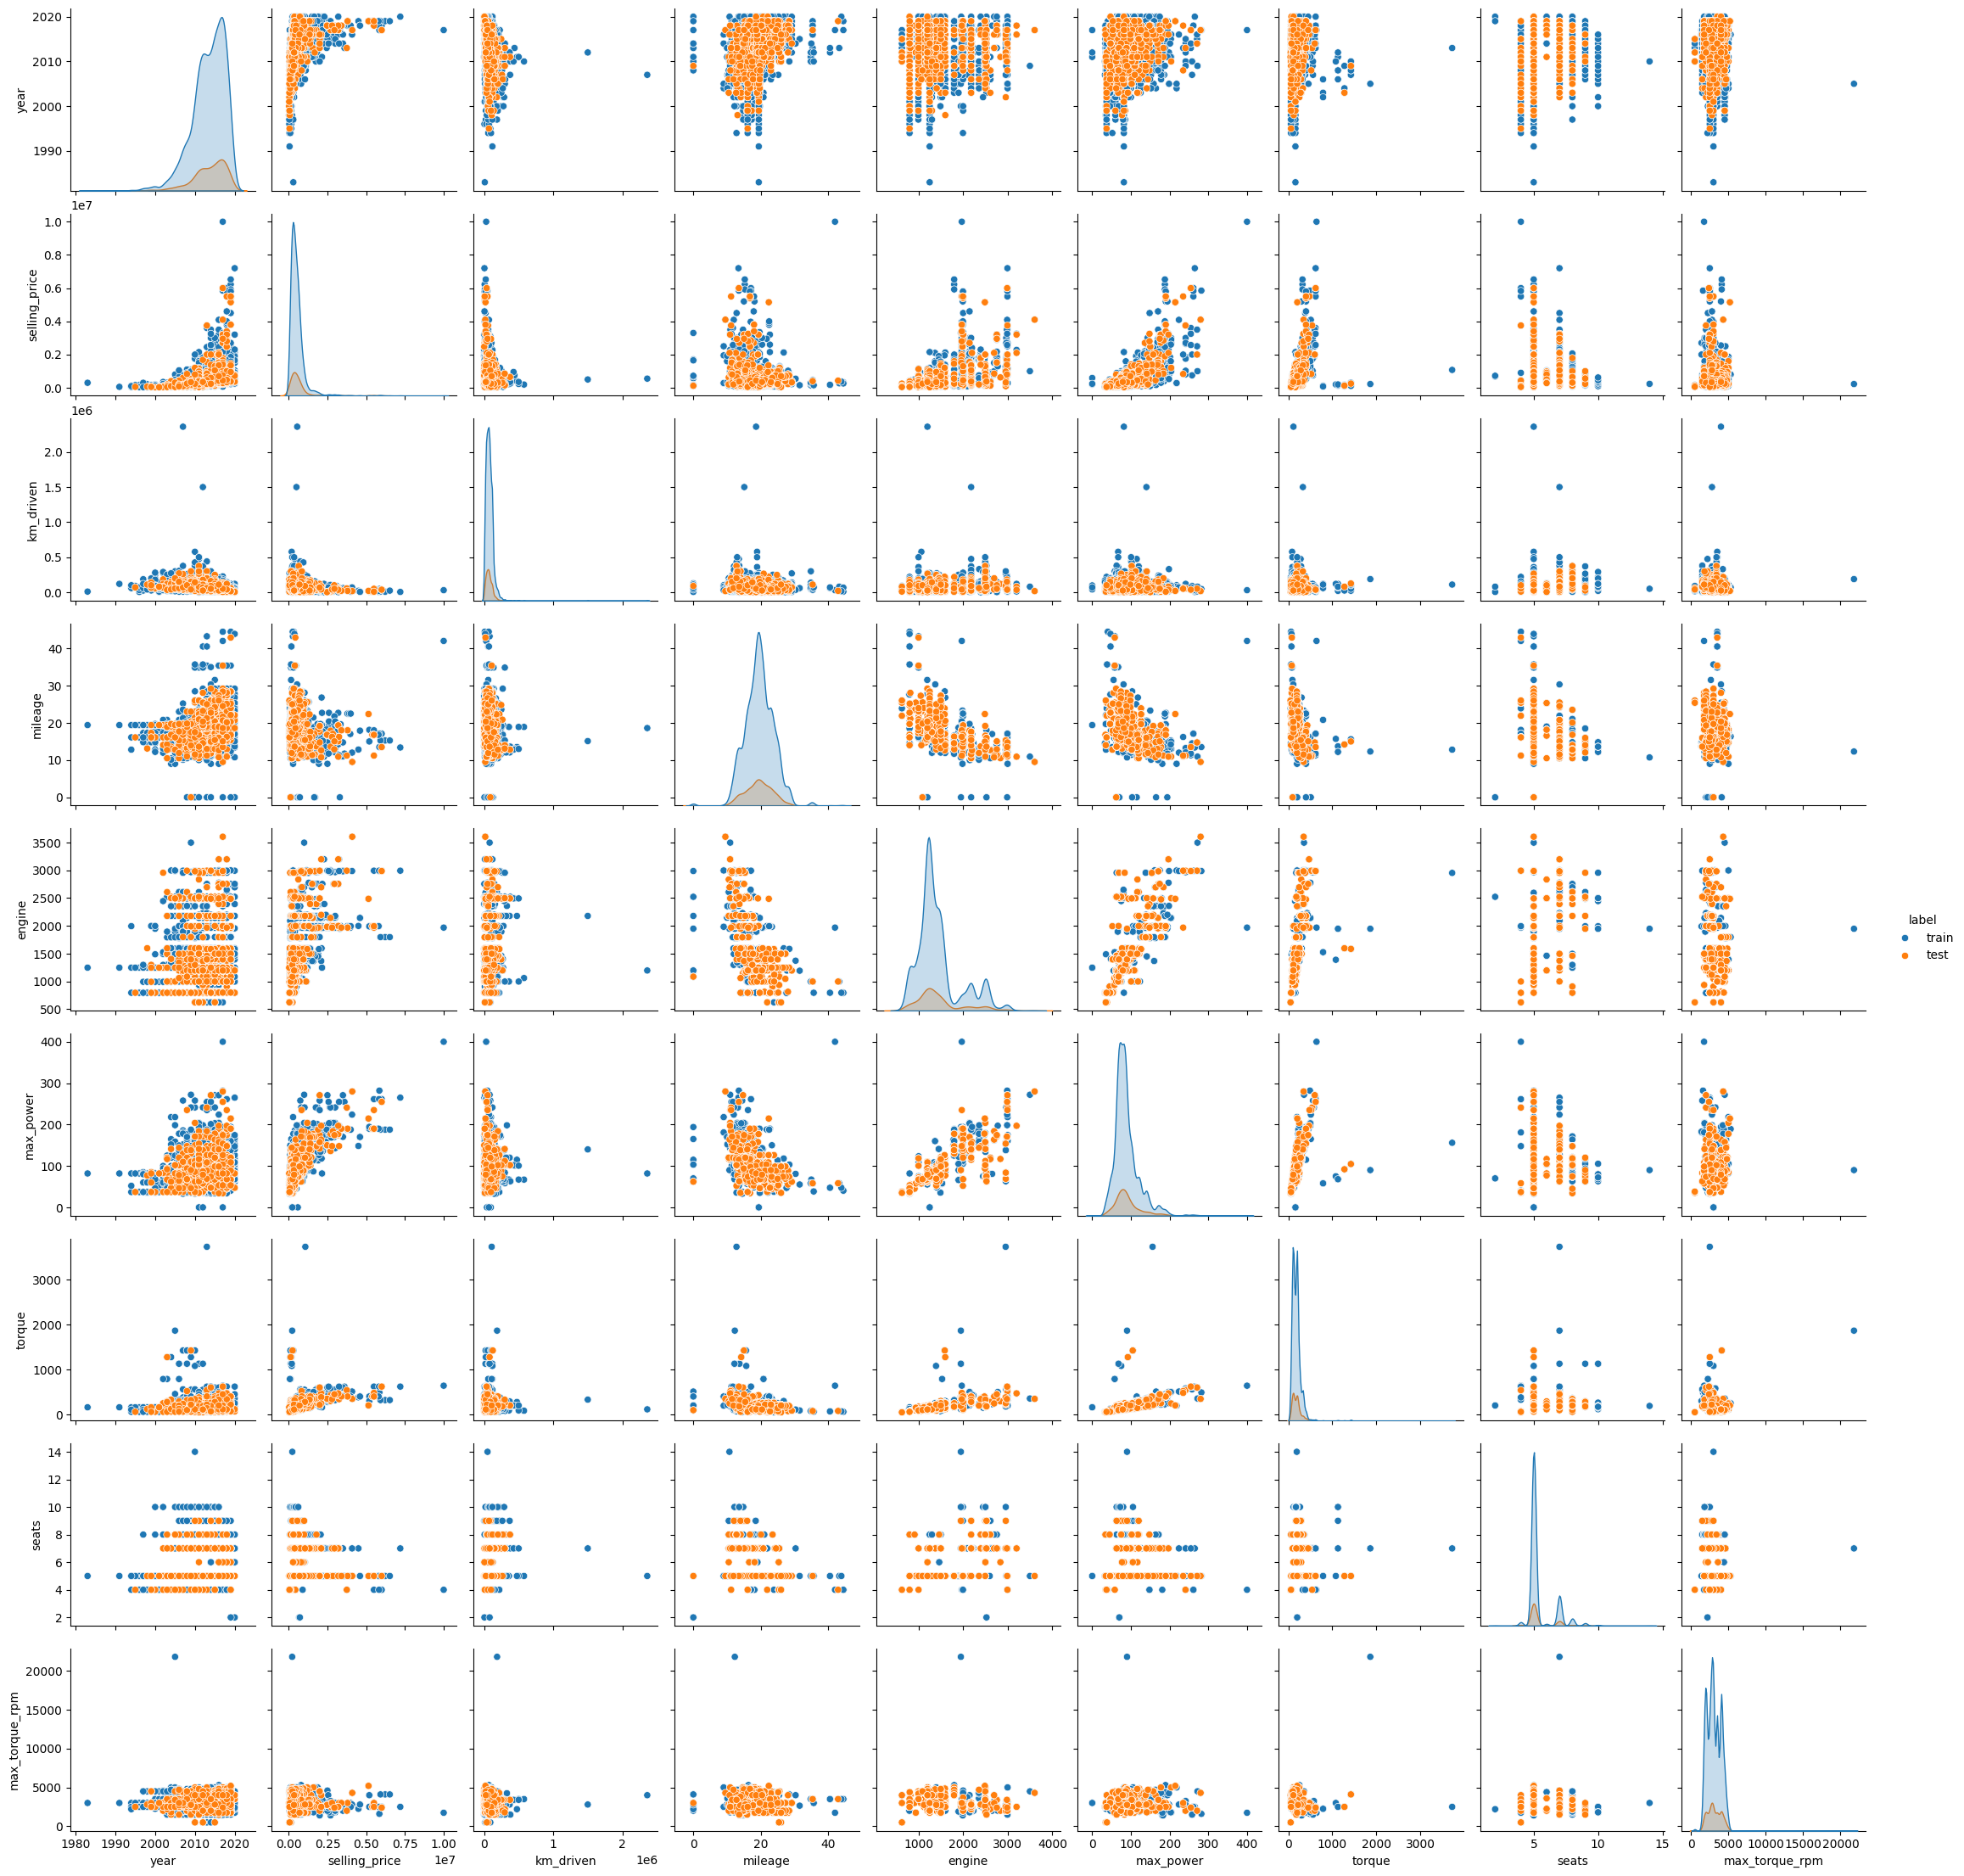

In [31]:
plot_df = pd.concat([df_train.assign(label="train"), df_test.assign(label="test")])
sns.pairplot(plot_df, hue="label", diag_kws=dict(common_norm=True))

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?</font>

Можно выделить переменные, которые заметно влияют на стоимость автомобиля. Например, по признаку `km_driven` (вероятно, пробег в км) видно, что при больших его значениях значения цены продажи низкое. Также бросается в глаза признак `year` - по нему видно, что новые машины стоят дороже, что ожидаемо. По `torque` также видно, что с увеличением значения в среднем растёт и цена. В общем и целом - связь есть и во многих случаях она интерпритируема.

* <font color='#FF6600'> А о корреляциях признаков? </font>

Есть признаки, между которыми прослеживается определенная связь, например, пары `engine` и `max_power` - при увеличении одного увеличивается и другое, то есть видим положительную корреляцию. Также есть связь между `torque` и `max_power`, `mileage` и  `engine`. Возможно, это может стать проблемой для линейной модели.

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

In [32]:
# сделал выше на одном графике, имхо так наглядней
# sns.pairplot(df_test)

 Да, распределения получаются похожими.

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

Text(0.5, 1.0, 'Тепловая карта корреляций числовых значений')

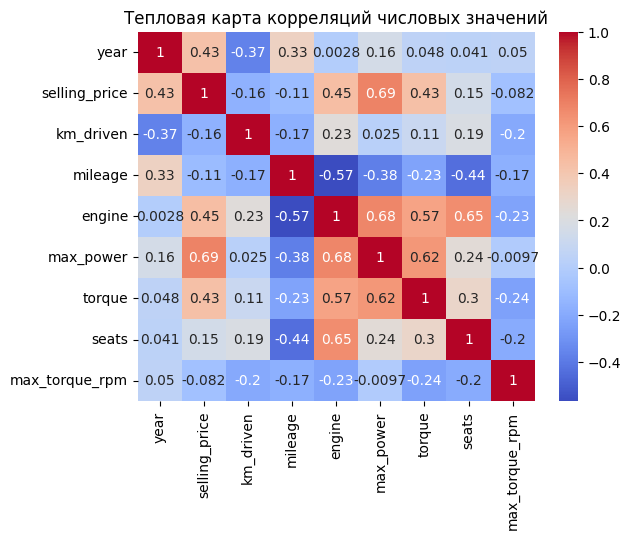

In [33]:
sns.heatmap(df_train.select_dtypes(np.number).corr(), annot=True, cmap="coolwarm")
plt.gca().set_title("Тепловая карта корреляций числовых значений")

In [34]:
df_train.select_dtypes(np.number).corr().abs().replace(1, 0).idxmax()

year              selling_price
selling_price         max_power
km_driven                  year
mileage                  engine
engine                max_power
max_power         selling_price
torque                max_power
seats                    engine
max_torque_rpm           torque
dtype: object

In [35]:
df_train.drop("selling_price", axis=1).select_dtypes(np.number).corr().abs().replace(1, 0).idxmax()

year              km_driven
km_driven              year
mileage              engine
engine            max_power
max_power            engine
torque            max_power
seats                engine
max_torque_rpm       torque
dtype: object

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font> По модулю самая низкая корреляция у `engine` и `year`.
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font> `engine` и `max_power` (если не считаем целевую переменную, иначе - `max_power` и `selling_price`)
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font> В целом, скорее да, т.к. корреляция отрицательная, но в общем случае это не означает причинно-следственную связь (так как корреляция может объясняться внешними факторами), поэтому можем утверждать это только с учётом того, что в целом это ожидаемо и интерпритируемо.

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

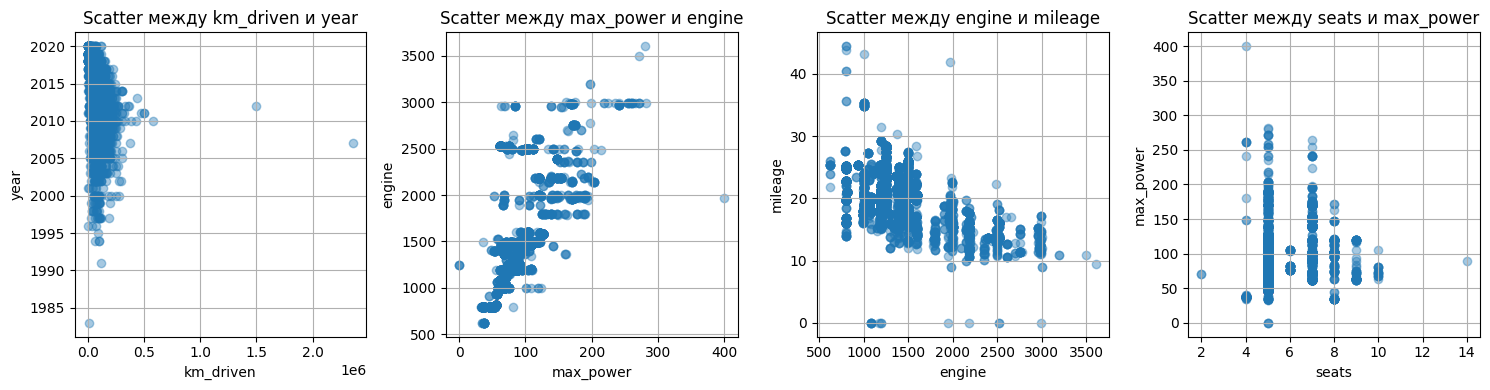

In [36]:
pairs = [("km_driven", "year"), ("max_power", "engine"), ("engine", "mileage"), ("seats", "max_power")]

fig, axes = plt.subplots(1, len(pairs), figsize=(15, 4))
for pair, ax in zip(pairs, axes):
    ax.scatter(df_train[pair[0]], df_train[pair[1]], alpha=0.4)
    ax.grid(True)
    ax.set_xlabel(pair[0])
    ax.set_ylabel(pair[1])
    ax.set_title(f"Scatter между {pair[0]} и {pair[1]}")
fig.tight_layout()
plt.show()

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

В столбце `name` много уникальных значений, пропустим на графиках.


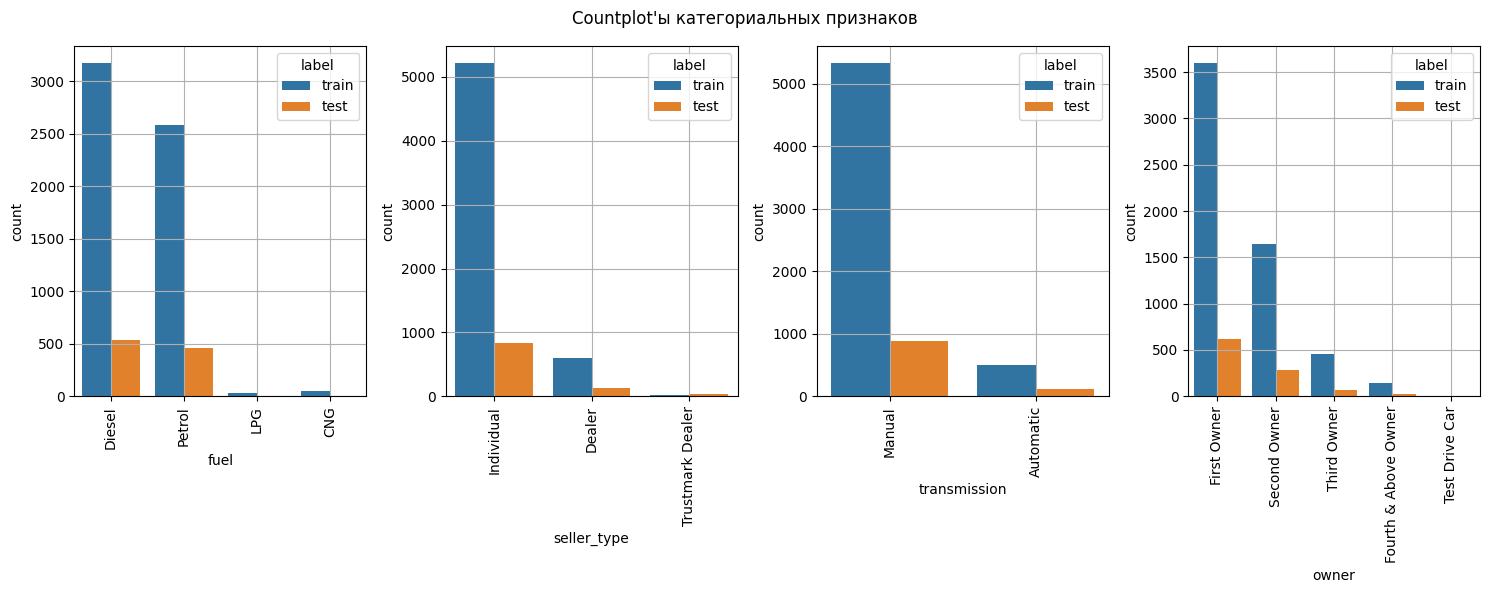

In [37]:
# Мы особо никак не визуализировали категориальные признаки, можно посмотреть на распределения значений в них
# Из этого мы сможем понять а) какие потенциально могут нам пригодится б) какие значения (редкие) можно отбросить или объеденить с другими

categorical_columns = df_train.select_dtypes(object).columns
plot_df = pd.concat([df_train.assign(label="train"), df_test.assign(label="test")])

filtered_columns = []
for column in categorical_columns:
    nunique_values = plot_df[column].nunique()
    if nunique_values > 10:
        print(f"В столбце `{column}` много уникальных значений, пропустим на графиках.")
    else:
        filtered_columns.append(column)
        
fig, axes = plt.subplots(1, len(filtered_columns), figsize=(15, 6))
for column, ax in zip(filtered_columns, axes):
    sns.countplot(data=plot_df, x=column, hue="label", stat="count", ax=ax)
    ax.tick_params(axis='x', rotation=90)
    ax.grid(True)
fig.suptitle("Countplot'ы категориальных признаков")
fig.tight_layout()
plt.show()

Есть значения, которых очень мало - возможно, в будущем их можно будет объеденить или выкинуть. Также можно посмотреть влияние на целевую переменную

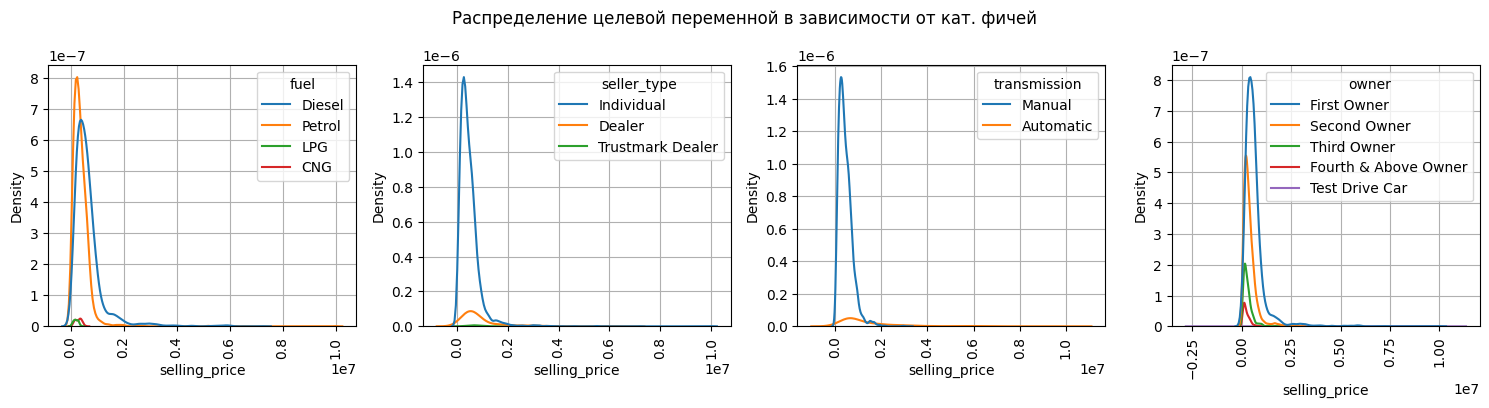

In [38]:
fig, axes = plt.subplots(1, len(filtered_columns), figsize=(15, 4))
for column, ax in zip(filtered_columns, axes):
    sns.kdeplot(data=df_train, x="selling_price", hue=column, ax=ax)
    ax.tick_params(axis='x', rotation=90)
    ax.grid(True)
fig.suptitle("Распределение целевой переменной в зависимости от кат. фичей")
fig.tight_layout()
plt.show()

Видно, что кол-во владельцев влияет на целевую переменную, чем меньше - тем выше цены.

Заодно посмотрели на распределение целевой переменной, что тоже полезно.

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [39]:
drop_columns = ["name", "fuel", "seller_type", "transmission", "owner", "selling_price"]

y_train = df_train["selling_price"]
X_train = df_train.drop(drop_columns, axis=1)

In [40]:
assert X_train.shape == (5840, 8)

In [41]:
y_test = df_test["selling_price"]
X_test = df_test.drop(drop_columns, axis=1)

In [42]:
assert X_test.shape == (1000, 8)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

def print_metrics(model, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, inverse_transform=None):
    # print(model)
    for name, dataset in zip(["train", "test"], [(X_train, y_train), (X_test, y_test)]):
        print(f"{name}:")
        y_hat = model.predict(dataset[0])
        if inverse_transform:
            y_hat = inverse_transform(y_hat)
        for metric in r2_score, MSE:
            print(f"{metric.__name__}:", round(metric(dataset[1], y_hat), 3))
            
            

lr = LinearRegression().fit(X_train, y_train)
print_metrics(lr)

train:
r2_score: 0.601
mean_squared_error: 114335651744.863
test:
r2_score: 0.601
mean_squared_error: 229583824062.532


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_scaled = LinearRegression().fit(X_train_scaled, y_train)
print_metrics(lr_scaled, X_train_scaled, X_test_scaled)

train:
r2_score: 0.601
mean_squared_error: 114335651744.863
test:
r2_score: 0.601
mean_squared_error: 229583824062.531


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font> `max_power`

In [45]:
list(zip(X_train.columns, lr_scaled.coef_))

[('year', 163443.4920174537),
 ('km_driven', -49006.85201574808),
 ('mileage', -3101.4993944108887),
 ('engine', 25594.064595190634),
 ('max_power', 331731.76366541884),
 ('torque', 4197.341193208096),
 ('seats', -28652.58871330133),
 ('max_torque_rpm', -57903.318415817674)]

In [46]:
X_train.columns[np.abs(lr_scaled.coef_).argmax()]

'max_power'

(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [47]:
from sklearn.linear_model import Lasso

lr_lasso = Lasso().fit(X_train_scaled, y_train)
print_metrics(lr_lasso, X_train_scaled, X_test_scaled)

train:
r2_score: 0.601
mean_squared_error: 114335651758.024
test:
r2_score: 0.601
mean_squared_error: 229584553661.717


In [48]:
lr_lasso.coef_

array([163441.43865314, -49005.91460065,  -3098.52454015,  25591.83020122,
       331733.13842233,   4196.75246465, -28648.70314835, -57901.40732598])

<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font> Нет, скорее всего из-за того, что коэф. регуляриации не очень большой

In [49]:
# можем радикально увеличить коэф и увидим что признаки занулились
lr_lasso_v2 = Lasso(alpha=10_000).fit(X_train_scaled, y_train)
list(zip(X_train.columns, lr_lasso_v2.coef_))

[('year', 153742.9676355168),
 ('km_driven', -39032.50355749059),
 ('mileage', 0.0),
 ('engine', 0.0),
 ('max_power', 337317.377621755),
 ('torque', 0.0),
 ('seats', -0.0),
 ('max_torque_rpm', -46206.624778596895)]

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [50]:
from sklearn.model_selection import GridSearchCV


def run_grid_search(
    model: "sklearn.base.BaseEstimator", 
    param_grid: dict,
    X_train: pd.DataFrame,
    y_train=y_train,
    cv=10,
    refit=True,
    scoring="r2",
):
    np.random.seed(42)
    gs = GridSearchCV(model, param_grid, cv=cv, refit=refit, scoring='r2')
    gs.fit(X_train, y_train)
    print("Лучшие параметры:", gs.best_params_)
    best_model = gs.best_estimator_
    return best_model

param_grid = {
    'alpha': [0.1, 1.0, 10.0, 100, 1000, 10_000],
    'fit_intercept': [True, False], # по сути можно убрать
    'selection': ['cyclic', 'random']
}

best_lasso = run_grid_search(Lasso(random_state=42), param_grid, X_train_scaled, y_train)
print_metrics(best_lasso, X_train_scaled, X_test_scaled)

Лучшие параметры: {'alpha': 10000, 'fit_intercept': True, 'selection': 'random'}
train:
r2_score: 0.598
mean_squared_error: 115106133531.733
test:
r2_score: 0.587
mean_squared_error: 237342313661.04


In [51]:
import itertools

cv = 10
refit = True
len(list(itertools.product(*param_grid.values()))) * cv + refit

241

<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font> Формула = мощность_декартово_произведения_множеств_параметров * количество_фолдов_кросс_валидации + флаг_переобучения_модели_на_всём_датасете = 241

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font> 10000 - да, занулились.

In [52]:
list(zip(X_train.columns, lr_lasso_v2.coef_))

[('year', 153742.9676355168),
 ('km_driven', -39032.50355749059),
 ('mileage', 0.0),
 ('engine', 0.0),
 ('max_power', 337317.377621755),
 ('torque', 0.0),
 ('seats', -0.0),
 ('max_torque_rpm', -46206.624778596895)]

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [53]:
from sklearn.linear_model import ElasticNet

param_grid = {
    'alpha': [0.1, 1.0, 10.0, 100, 1000, 10_000],
    'l1_ratio': np.arange(0.1, 1.05, 0.1),
    'fit_intercept': [True, False], # по сути можно убрать
    'selection': ['cyclic', 'random']
}

best_elastic = run_grid_search(ElasticNet(random_state=42), param_grid, X_train_scaled, y_train)
print_metrics(best_elastic, X_train_scaled, X_test_scaled)

Лучшие параметры: {'alpha': 1.0, 'fit_intercept': True, 'l1_ratio': 0.9, 'selection': 'random'}
train:
r2_score: 0.596
mean_squared_error: 115888794375.064
test:
r2_score: 0.577
mean_squared_error: 242878298668.176


<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [54]:
{'alpha': 1.0, 'fit_intercept': True, 'l1_ratio': 0.9, 'selection': 'random'}

{'alpha': 1.0, 'fit_intercept': True, 'l1_ratio': 0.9, 'selection': 'random'}

Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.5 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [55]:
X_train_cat = df_train.drop(columns=["selling_price", "name"])
X_test_cat = df_test.drop(columns=["selling_price", "name"])
X_train_cat.shape

(5840, 12)

In [56]:
assert X_train_cat.shape == (5840, 12)

In [57]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [58]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

X_train_cat = pd.get_dummies(X_train_cat, drop_first=True) # удаляем один из столбцов, чтобы не было корреляции
X_test_cat = pd.get_dummies(X_test_cat, drop_first=True)

(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font> да!

In [59]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV


param_grid = {
    'alpha': [0.1, 1.0, 10.0, 100, 1000, 10_000],
    # 'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'],
    'fit_intercept': [True, False], # по сути можно убрать
}


best_ridge = run_grid_search(Ridge(random_state=42), param_grid, X_train_cat, y_train)
print_metrics(best_ridge, X_train_cat, X_test_cat)

Лучшие параметры: {'alpha': 10.0, 'fit_intercept': True}
train:
r2_score: 0.646
mean_squared_error: 101581991106.146
test:
r2_score: 0.648
mean_squared_error: 202444972802.446


Вообще говоря в прошлых вариантах не везде правильно использовался `StandardScaler`, поскольку данные из его "обучения" присутствовали в валидационной выборке в момент CV. По-правильномк стоит собрать `Pipeline`, который будет содержать в себе все необходимые трансформации и предобработки и позволит избежать лика. Я решил построить такой пайпалайн и проверить, что итоговое качество не ухудшилось.

In [60]:
from sklearn.pipeline import FunctionTransformer, make_pipeline
from sklearn.compose import make_column_transformer
from utils import fix_columns

X_train_final = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
X_train_final = X_train_final.loc[~X_train_final.drop("selling_price", axis=1).duplicated(keep="first")]
X_test_final = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

NUMERIC_FEATURES = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']
CATEGORICAL_FEATURES = ['fuel', 'seller_type', 'transmission', 'owner']

numeric_transformer =  make_pipeline(SimpleImputer(missing_values=np.nan, strategy="median"), StandardScaler(with_mean=False, with_std=False))
categorical_transformer = OneHotEncoder(drop="first", handle_unknown="ignore")
column_transformer = make_column_transformer((numeric_transformer, NUMERIC_FEATURES), (categorical_transformer, CATEGORICAL_FEATURES))

pipeline = make_pipeline(
    FunctionTransformer(fix_columns),
    column_transformer,
    Ridge(**{'alpha': 10.0, 'fit_intercept': True}, random_state=42)
)

param_grid = {
    'ridge__alpha': [0.1, 1.0, 10.0, 100, 1000, 10_000],
    'ridge__fit_intercept': [True, False], # по сути можно убрать
}

BEST_MODEL = run_grid_search(pipeline, param_grid, X_train_final, y_train)
print_metrics(BEST_MODEL, X_train_final, X_test_final)

Лучшие параметры: {'ridge__alpha': 10.0, 'ridge__fit_intercept': True}
train:
r2_score: 0.646
mean_squared_error: 101581991106.146
test:
r2_score: 0.648
mean_squared_error: 202444972802.446


Ура, качество сохранилось. (в целом StandardScaler скорее необязателен, но оставим, т.к. может быть хорошей практикой, в некоторых случаях ускоряя гс и тд). Сохраним весь пайп.

In [61]:
BEST_MODEL

Pipeline(steps=[('functiontransformer',
                 FunctionTransformer(func=<function fix_columns at 0x7fc8fc5a2d40>)),
                ('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler(with_mean=False,
                                                                                  with_std=False))]),
                                                  ['year', 'km_driven',
                                                   'mileage', 'engine',
                                                   'max_power', 'torque',
                                                   'seats', 'max_torque_rpm']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['fuel', 'seller_type',
                                                   'transmission',
                                                   'owner'])])),
                ('ridge', Ridge(alpha=10.0, random_state=42))])

# Часть 4 - бонусная (1.5 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

* Попробуем начать с +- стандартного - трансформация таргета с целью приведение его распределение к нормальному.

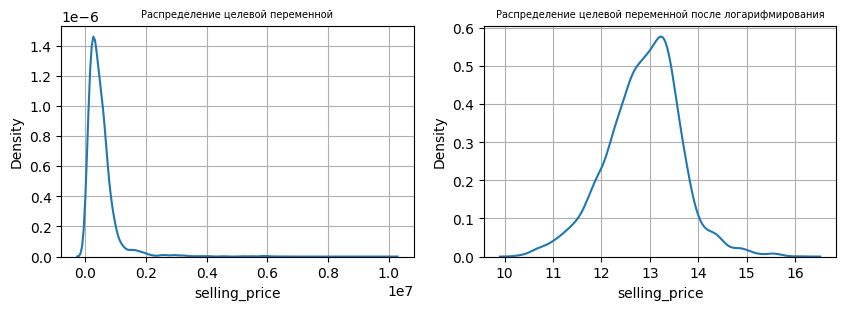

In [62]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
sns.kdeplot(y_train, ax=ax[0])
ax[0].set_title("Распределение целевой переменной", fontsize=7)
ax[0].grid(True)

sns.kdeplot(np.log(y_train), ax=ax[1])
ax[1].grid(True)
ax[1].set_title("Распределение целевой переменной после логарифмирования", fontsize=7)
plt.show()

Видим, что после трансформации распределение чуть больше похоже на нормальное (по-хорошему ещё можно попробовать трансформацию Бокса-Кокса с разными параметрами), поэтому проверим как это повлияет на качество модели. Можем использовать для этого `TransformedTargetRegressor`, который на этапе `fit` будет применять к таргету `log1p`, а на моменте `predict` будем применять к предикту `expm1`.

In [63]:
from sklearn.compose import TransformedTargetRegressor

param_grid = {
    'transformedtargetregressor__regressor__alpha': [0.1, 1.0, 10.0, 100, 1000, 10_000],
    'transformedtargetregressor__regressor__fit_intercept': [True, False], # по сути можно убрать
}

regressor = TransformedTargetRegressor(
    Ridge(**{'alpha': 10.0, 'fit_intercept': True}, random_state=42),
    func=np.log1p,
    inverse_func=np.expm1,
)

pipeline = make_pipeline(
    FunctionTransformer(fix_columns),
    column_transformer,
    regressor
)

BEST_MODEL_V2 = run_grid_search(pipeline, param_grid, X_train_final)
print_metrics(BEST_MODEL_V2, X_train_final, X_test_final)

Лучшие параметры: {'transformedtargetregressor__regressor__alpha': 0.1, 'transformedtargetregressor__regressor__fit_intercept': True}
train:
r2_score: 0.821
mean_squared_error: 51397480919.23
test:
r2_score: 0.821
mean_squared_error: 102718771347.571


Получилось улучшить метрики! Также по некоторым графикам из `pairplot` может показаться, что в данных имеются нелинейный зависимости, поэтому ещё одним достаточно быстрым улучшением может стать добавление полиномиальных фичей, рассмотрим степень 2,

In [64]:
import warnings
from sklearn.preprocessing import PolynomialFeatures


param_grid = {
    'transformedtargetregressor__regressor__alpha': [0.1, 1.0, 10.0, 100, 1000, 10_000],
    'transformedtargetregressor__regressor__fit_intercept': [True, False], # по сути можно убрать
}

pipeline = make_pipeline(
    FunctionTransformer(fix_columns),
    column_transformer,
    PolynomialFeatures(degree=2),
    regressor,
)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    BEST_MODEL_V3 = run_grid_search(pipeline, param_grid, X_train_final)

print_metrics(BEST_MODEL_V3, X_train_final, X_test_final)

Лучшие параметры: {'transformedtargetregressor__regressor__alpha': 0.1, 'transformedtargetregressor__regressor__fit_intercept': True}
train:
r2_score: 0.885
mean_squared_error: 32969350249.752
test:
r2_score: 0.919
mean_squared_error: 46582351614.183


Качество получилось улучшить ещё сильнее. Будем использовать эту модель как финальную.

In [65]:
from joblib import dump, load
dump(BEST_MODEL_V3, 'BEST_MODEL_PIPE.pkl') 
BEST_MODEL = load('BEST_MODEL_PIPE.pkl') 

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [66]:
def business_metrics(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    return np.mean(np.abs(y_pred / y_true - 1) <= 0.1)

In [67]:
business_metrics([1], [0.89]), business_metrics([1], [0.91]), business_metrics([1], [1.09]), business_metrics([1], [1.11])

(0.0, 1.0, 1.0, 0.0)

In [68]:
y_pred = BEST_MODEL.predict(X_test_final)
print(f"'Бизнесовая' метрика для лучшей модели: {business_metrics(y_test, y_pred)}")

'Бизнесовая' метрика для лучшей модели: 0.354


# Часть 5 (2.5 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

__Описание решения__:
* будем считать, что сервис принимает на вход "сырые" данные, по формату аналогичные тому, что содержится в тестовом датафрейме (естественно без таргета);
* в качестве объекта модели будем использовать Pipeline, который уже включает в себя:
  * предобработку единиц измерения;
  * разделение столбца torque;
  * приведение числовых столбцов к нужному типу.
* На стороне сервиса использование модели сводится к тому, что мы применяем сформированный пайплайн к входящим данным и все преобразования происходят внутри него.

In [69]:
from fastapi import FastAPI, UploadFile
from fastapi.responses import FileResponse
from pydantic import BaseModel
from typing import List
import tempfile

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    item = pd.DataFrame([item.model_dump()])
    return np.nan_to_num(BEST_MODEL.predict(item)[0])


@app.post("/predict_items")
def predict_items(upload_file: UploadFile) -> FileResponse:
    items = pd.read_csv(upload_file.file)
    items["predict"] = BEST_MODEL.predict(items)
    headers = {'Content-Disposition': 'attachment; filename="prediction.csv"'}
    with tempfile.NamedTemporaryFile() as temp:
        items.to_csv(f"{temp.name}.csv")
        return FileResponse(f"{temp.name}.csv", headers=headers)

In [70]:
# import asyncio
# import uvicorn

# if __name__ == "__main__":
#     config = uvicorn.Config(app)
#     server = uvicorn.Server(config)
#     await server.serve()

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link